# Data understanding

## Data understanding

数据集来自kaggle, 提供Ames, Iowa的历史房价，预测新的房价。
共有79个变量。

# Data preparation and preprocessing

## Data collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.shape

(1460, 81)

In [4]:
test_data.shape

(1459, 80)

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
continuous_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                       '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                       'TotRmsAbvGrd','Fireplaces','GarageCars',
                       'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                      'ScreenPorch','PoolArea','MiscVal','YearBuilt','YearRemodAdd','GarageYrBlt',]

In [8]:
ordinal_features = ['Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope','OverallQual',
                   'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual','BsmtCond',
                   'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'HeatingQC','CentralAir', 'Electrical',
                   'KitchenQual','Functional','FireplaceQu','GarageQual','GarageCond','PavedDrive',
                   'PoolQC','Fence','GarageFinish']

nominal_features = [col for col in train_data.columns if col not in continuous_features+ordinal_features]
nominal_features = list(set(nominal_features) - set(['SalePrice','Id']))

In [9]:
# col_to_drop = [col for col in continuous_features+ordinal_features+nominal_features if col not in train_data]

# continuous_features=[col for col in continuous_features if col not in col_to_drop]
# ordinal_features=[col for col in ordinal_features if col not in col_to_drop]
# nominal_features=[col for col in nominal_features if col not in col_to_drop]

# print(len(continuous_features)+len(ordinal_features)+len(nominal_features))

In [10]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## Data exploration

In [11]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


以上是数值column(38个)的一些统计数据。比如，可以看到该training数据集最新的房建于2010年（信息比较旧），也许不适合测试最近几年房价。

In [12]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

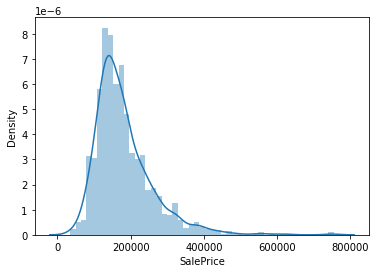

In [13]:
sns.distplot(train_data['SalePrice'])

In [14]:
train_data['SalePrice'].mode()

0    140000
dtype: int64

可以看出来SalePrice这一变量呈偏态分布，而且是positive skew(right skew)，即右尾(right tail)更长，平均数更偏向右边，一般大于其中位数(确实是，180921>163000>14000(众数))。

In [15]:
train_data['SalePrice'].skew()

1.8828757597682129

In [16]:
train_data['SalePrice'].kurt()

6.536281860064529

在所有房价中，最高房价755000，最低房价34900，平均房价180921，标准差为79443。
偏度为1.88（右偏），峰度为6.54大于正态分布的3，相对“厚尾尖峰”。

## Data preprocessing

### Functions for preprocessing

In [17]:
def drop_target(train_df):
    # Remove rows with missing target, separate target from predictors
    if 'SalePrice' in train_df.columns:
        train_df.dropna(axis=0, subset=['SalePrice'], inplace=True)
        y = train_data.SalePrice
        train_df.drop(['SalePrice'], axis=1, inplace=True)
        return [train_data, y]

In [18]:
def check_missing(train_df):
    cols_with_missing = [col for col in train_df.columns if train_df[col].isnull().any()]
    # Number of missing values in each column of training data
    missing = {}
    for col in cols_with_missing:
        missing[col] = [train_data[col].dtype, train_data[col].isnull().sum(), train_data[col].isnull().sum()/train_data.shape[0]]
    return missing

def print_missing(missing):
    for k, v in missing.items():
        print(k, "  ", v[0], "  ", v[1], "  miss_rate: ", v[2])
        
def print_high_missing(missing):
    threshhold = 0.8
    for k, v in missing.items():
        if v[2]>=threshhold:
            print(k, "  ", v[0], "  ", v[1], "  miss_rate: ", v[2])

In [19]:
# Label encoding for ordinal data
import category_encoders as ce

def encoding_ordinal(df, col, order):
    train_df=pd.DataFrame({col:df[col]})
    
    # create object of Ordinal encoding
    encoder= ce.OrdinalEncoder(cols=[col],return_df=True,
                               mapping=[{'col':col,
    'mapping': order}])

    #Original data
    train_df

    #fit and transform train data 
    df_train_transformed = encoder.fit_transform(train_df)
    return df_train_transformed

In [20]:
# Function for imputation
from sklearn.impute import SimpleImputer

def impute_missing(X, approach):
    # approach is the strategy for imputing numerical variables (because categorical uses 'most_frequent')
    num_imputer = SimpleImputer(strategy=approach)
    cat_imputer = SimpleImputer(strategy='most_frequent')
    
    X_cat = X.filter(ordinal_features+nominal_features, axis=1)
    X_num = X.filter(continuous_features, axis=1)
    
    any_missing = len([col for col in X_cat if X_cat[col].isnull().sum()>0])+len([col for col in X_num if X_num[col].isnull().sum()>0])
    
    if any_missing>0:
        imputed_X_num = pd.DataFrame(num_imputer.fit_transform(X_num))
        imputed_X_cat = pd.DataFrame(cat_imputer.fit_transform(X_cat))
        
        # Fill in the lines below: imputation removed column names; put them back
        imputed_X_num.columns = X_num.columns
        imputed_X_cat.columns = X_cat.columns
    
        imputed_X = pd.concat([imputed_X_num,imputed_X_cat], axis=1, ignore_index=False)

        return imputed_X

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for calculating MAE (based on a random forest tree model)
def get_mae(X_train, X_valid, y_train, y_valid, model):
    #e.g. model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

### drop target

In [22]:
temp = drop_target(train_data).copy()

In [23]:
train_data = temp[0]
y = temp[1]

### imputing missing values

In [24]:
print_missing(check_missing(train_data))

LotFrontage    float64    259   miss_rate:  0.1773972602739726
Alley    object    1369   miss_rate:  0.9376712328767123
MasVnrType    object    8   miss_rate:  0.005479452054794521
MasVnrArea    float64    8   miss_rate:  0.005479452054794521
BsmtQual    object    37   miss_rate:  0.025342465753424658
BsmtCond    object    37   miss_rate:  0.025342465753424658
BsmtExposure    object    38   miss_rate:  0.026027397260273973
BsmtFinType1    object    37   miss_rate:  0.025342465753424658
BsmtFinType2    object    38   miss_rate:  0.026027397260273973
Electrical    object    1   miss_rate:  0.0006849315068493151
FireplaceQu    object    690   miss_rate:  0.4726027397260274
GarageType    object    81   miss_rate:  0.05547945205479452
GarageYrBlt    float64    81   miss_rate:  0.05547945205479452
GarageFinish    object    81   miss_rate:  0.05547945205479452
GarageQual    object    81   miss_rate:  0.05547945205479452
GarageCond    object    81   miss_rate:  0.05547945205479452
PoolQC    ob

In [25]:
print_high_missing(check_missing(train_data))

Alley    object    1369   miss_rate:  0.9376712328767123
PoolQC    object    1453   miss_rate:  0.9952054794520548
Fence    object    1179   miss_rate:  0.8075342465753425
MiscFeature    object    1406   miss_rate:  0.963013698630137


In [26]:
# update feature columns after drop above columns
continuous_features=[col for col in continuous_features if col not in ['Alley','PoolQC','Fence','MiscFeature']]
ordinal_features=[col for col in ordinal_features if col not in ['Alley','PoolQC','Fence','MiscFeature']]
nominal_features=[col for col in nominal_features if col not in ['Alley','PoolQC','Fence','MiscFeature']]

In [27]:
# Run impute function
imputed_X = impute_missing(train_data,'mean')
# print(imputed_X.head())

In [28]:
print_missing(check_missing(imputed_X))

### Label Encoding

In [29]:
# manual encoding ordinal data
def manual_encoding_ordinal(labeled_data, labeled_data_1):
    ordinal_dict = {
        'LotShape':{'Reg':0,'IR1':1,'IR2':2,'IR3':3},
        'LandContour': {'Lvl':0,'Bnk':1,'HLS':2,'Low':3}, 
        'Utilities': {'AllPub':0, 'NoSewr':1, 'NoSewa':2, 'ELO':3}, 
        'LandSlope': {'Gt1':0,'Mod':1,'Sev':2},  
        'ExterQual': {'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4}, 
        'ExterCond': {'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4}, 
        'BsmtQual': {'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'NA':5}, 
        'BsmtCond': {'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'NA':5}, 
        'BsmtExposure': {'Gd':0,'Av':1,'Mn':2,'No':3,'NA':4}, 
        'BsmtFinType1': {'GLQ':0, 'ALQ':1,'BLQ':2,'Rec':3,'LwQ':4,'Unf':5,'NA':6}, 
        'BsmtFinType2': {'GLQ':0, 'ALQ':1,'BLQ':2,'Rec':3,'LwQ':4,'Unf':5,'NA':6}, 
        'HeatingQC': {'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4}, 
        'CentralAir': {'N':0,'Y':1}, 
        'Electrical': {'SBrkr':0,'FuseA':1,'FuseF':2,'FuseP':3,'Mix':4}, 
        'KitchenQual': {'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4}, 
        'Functional': {'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7}, 
        'FireplaceQu': {'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'NA':5}, 
        'GarageQual': {'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'NA':5}, 
        'GarageCond': {'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'NA':5}, 
        'PavedDrive': {'Y':0,'P':1,'N':2},
        'GarageFinish': {'Fin':0,'RFn':1,'Unf':2,'NA':3}
    }
    for (k, v) in ordinal_dict.items():
        if k in labeled_data.columns:
            labeled_data[k] = encoding_ordinal(labeled_data, k, v)[k]
            labeled_data_1[k+'_Encoding'] = encoding_ordinal(labeled_data_1, k, v)[k]

In [30]:
labeled_data = imputed_X.copy()
labeled_data_1 = imputed_X.copy()
manual_encoding_ordinal(labeled_data, labeled_data_1)

In [31]:
# dummy encoding nominal data
dummied_data = pd.get_dummies(labeled_data, columns=nominal_features)

In [32]:
print(dummied_data.shape) # now, dummied_data = impute missing values -> label encoding.. 
                            # ..ordinal+nominal data

(1460, 245)


In [33]:
# Label encoding for nominal data (just for feature enineering)
# print(nominal_features)
factorized_data = labeled_data.copy()
factorized_data_1 = labeled_data.copy()
for col in nominal_features:
    factorized_data[col], _ = factorized_data[col].factorize()
    factorized_data_1[col+'_Encoding'], _ = factorized_data[col].factorize()

In [34]:
# Define and fit model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# For check the effects of imputation, we split the train_data to test its MAE score.
from sklearn.model_selection import train_test_split

f_X_train, f_X_valid, f_y_train, f_y_valid = train_test_split(factorized_data, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)


# Get validation predictions and MAE
print("MAE:")
print(get_mae(f_X_train, f_X_valid, f_y_train, f_y_valid, model))

MAE:
17347.517499999998


In [35]:
# Define and fit model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# For check the effects of imputation, we split the train_data to test its MAE score.
from sklearn.model_selection import train_test_split

d_X_train, d_X_valid, d_y_train, d_y_valid = train_test_split(dummied_data, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)


# Get validation predictions and MAE
print("MAE:")
print(get_mae(d_X_train, d_X_valid, d_y_train, d_y_valid, model))

MAE:
17150.983253424663


## Feature engineering

原training数据集有79个变量，选出关键features很重要。

**Mutual Information**
Mutual information(MI)基于信息熵(entropy)可以计算出一个变量随另一个变量而不确定性降低的程度（依赖程度）。而且是广义general的关系，不只是线性关系(correlation)。

In [36]:
discrete_features = []
for col in factorized_data.columns:
    if col in nominal_features+ordinal_features:
        discrete_features.append(True)
    else:
        discrete_features.append(False)
# print(discrete_features)

In [37]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(factorized_data, y, discrete_features)
mi_scores.head(25) # show a few features with their MI scores

OverallQual     0.578984
Neighborhood    0.532062
GrLivArea       0.481235
GarageCars      0.367658
TotalBsmtSF     0.367433
GarageArea      0.363582
YearBuilt       0.359976
ExterQual       0.327781
KitchenQual     0.325488
BsmtQual        0.315022
1stFlrSF        0.307963
GarageYrBlt     0.292941
MSSubClass      0.279671
FullBath        0.253173
GarageFinish    0.252527
YearRemodAdd    0.249040
TotRmsAbvGrd    0.205441
2ndFlrSF        0.201450
Foundation      0.198500
LotFrontage     0.196063
Fireplaces      0.172418
HeatingQC       0.170570
Exterior2nd     0.160956
LotArea         0.157605
BsmtFinSF1      0.144526
Name: MI Scores, dtype: float64

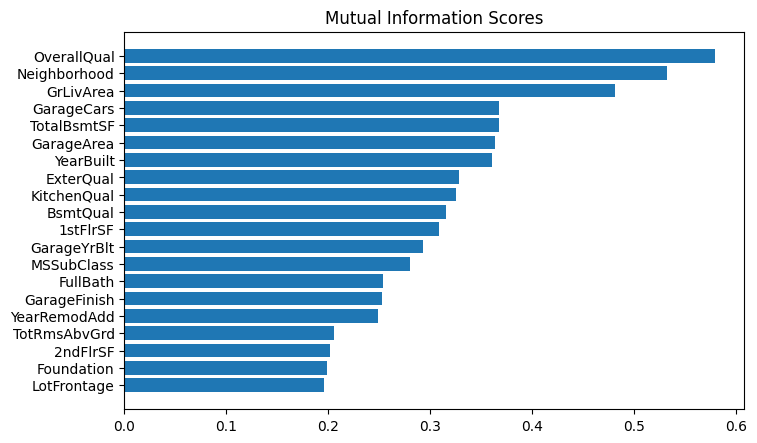

In [38]:
###### def plot_mi_scores(scores):

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

# print(mi_scores.head(20).index)


上图显示与目标(target)变量SalePrice“互信息”最高的前20个features。不难发现，整体材料和饰面质量(OverallQual)、物理位置/周边情况(Neighborhood)、车库面积(GarageArea) 、地面以上居住面积(GrLivArea)、建筑年份 (YearBuilt) 、地下室总面积(TotalBsmtSF) 、地皮面积(LotArea)、车库容量 (GarageCars)等都是影响售价的重要因素，也符合常识。

但是，理论上，还应考虑到一些问题：
1. MI 得分低的features不一定就对SalePrice没影响，可能会间接影响其它MI得分高的features，或者几个低Mi的feature组合起来总是对target产生较大影响。
2. features之间可以重新transform成新的feature。

下面对上述两种问题稍作探索。

 其它可能的影响因素？
 - BldgType 住宅类型
 - CentralAir 中央空调状况
 - Electrical 电力系统
 - Functional 房屋功用性评级
 - Heating 供暖质量
 - LotShape 房子整体形状
 - MSZoning 区域分类
 - Street 街道类型
 - Utilities 公共设施类型

In [39]:
f_data = pd.concat([factorized_data,y], axis=1, ignore_index=False)
f1_data = pd.concat([factorized_data_1,y], axis=1, ignore_index=False)

In [40]:
# print(train_data.head())
# print(f_data.head())

In [41]:
def catplot_y(feature):
    sns.catplot(x=feature, y="SalePrice", data=f1_data, kind="boxen");

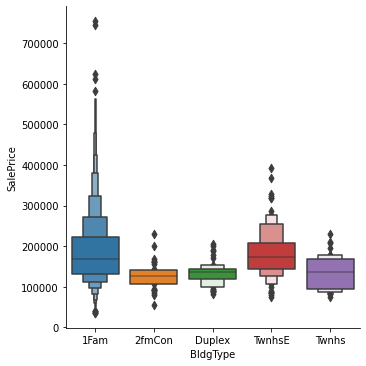

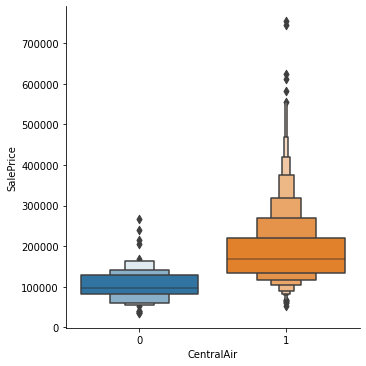

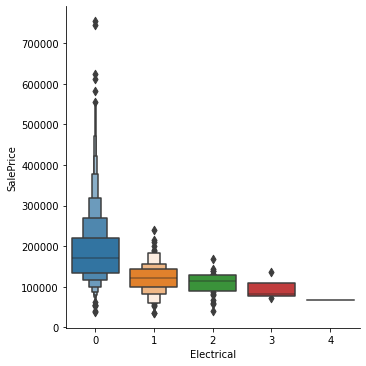

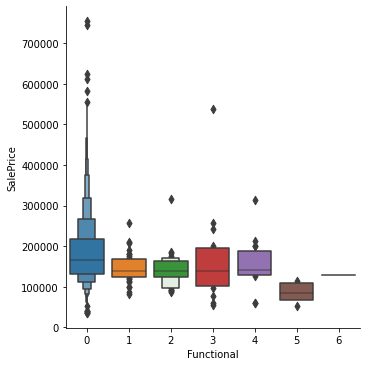

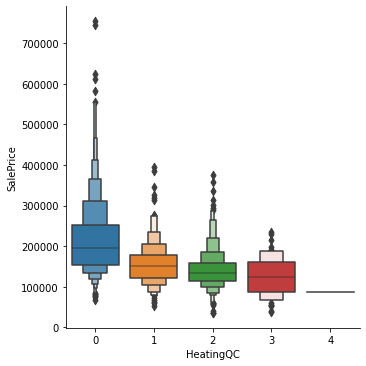

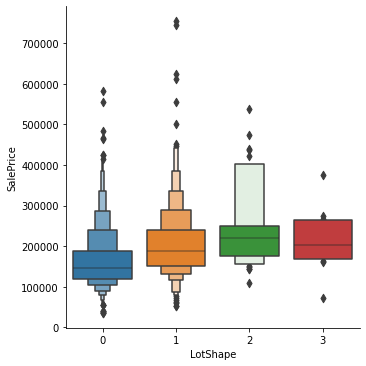

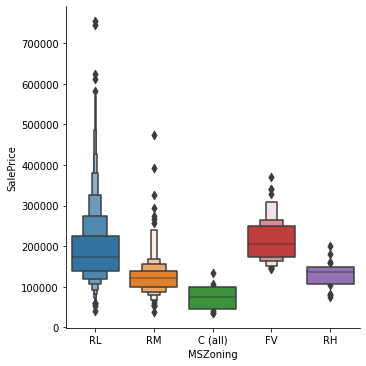

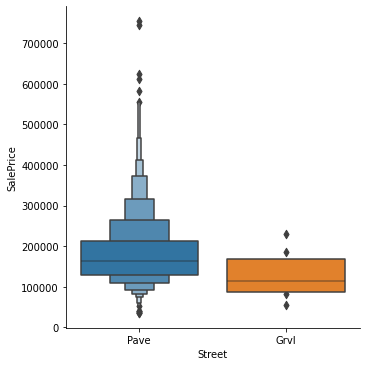

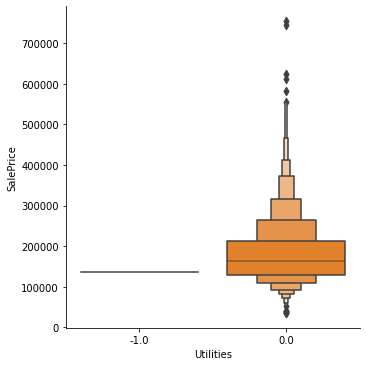

In [42]:
low_mi_features = ['BldgType', 'CentralAir', 'Electrical', 'Functional', 'HeatingQC', 'LotShape',
                  'MSZoning', 'Street', 'Utilities']
for f in low_mi_features:
    catplot_y(f)

1. **BldgType 住宅类型**
由图可见住宅类型对SalePrice还是有影响的。不同类型的住宅把售价限定在不同范围内。
2. **CentralAir 中央空调状况**
明显有中央空调的售价普遍比没有的高（**集中趋势、较大值**更大）。
3. **Electrical 电力系统**
不同电力系统和售价也有一定关系，按数据描述，从SBrkr到FuseA, FuseF, FuseP应该是质量越来越差，图中反映也是如此，售价越来越低。
4. **Functional 房屋功用性评级**
除了最好(Typ)和次差的(Maj2)其它差别不大。
5. **HeatingQC 供暖质量**
供暖质量也比较明显影响售价分布。
6. **LotShape 房子整体形状**
轻度不规则的房子比规则的房子平均售价更高，而中度不规则的房子平均售价比轻度的还高，而且售价比较集中，几乎没有太低的售价，不规则程度最高的售价最为集中。
7. **MSZoning 区域分类**
区域分类与售价也有较明显关系。
很明显，FV（村庄水上建筑）售价中位数最高，而且相对集中在较高价格。而C（商业区）相反，售价中位数最低，集中在较低价位。人口密度高RH的住宅区和人口密度中等RM的住宅区，售价集中在差不多的区间(IQR近似），但RH区域价格相比RM区域非常集中，几乎没有较低或较高的售价。RL人口密度最低的区域，拥有最广的售价分布。
8. **Street 街道类型**
街道铺过的明显比没铺的售价平均要高一些，而且没铺过的售价相对集中（几乎没有太贵或太便宜的）。
9. **Utilities 公共设施类型**
可能缺少数据，参考意义不大。

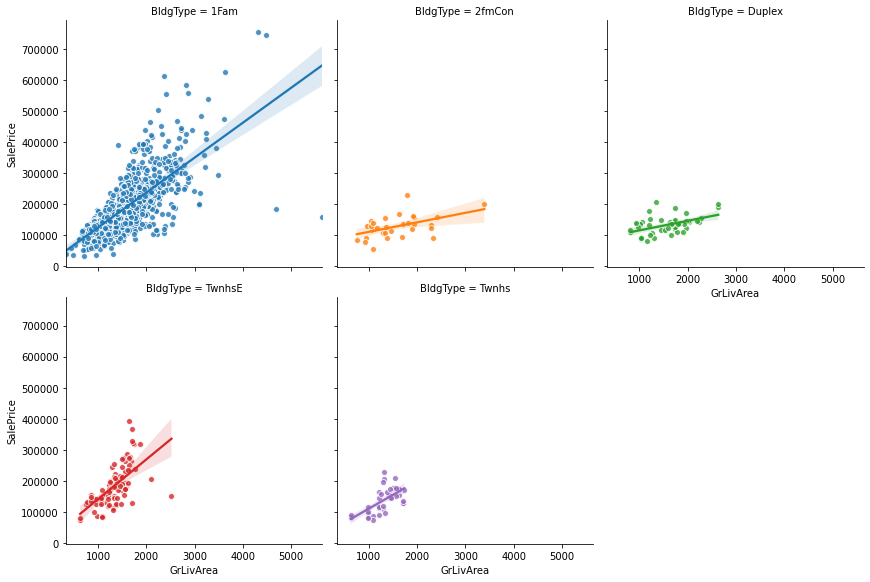

In [43]:
sns.lmplot(
    x="GrLivArea", y="SalePrice", hue="BldgType", col="BldgType",
    data=f1_data, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

上图可看出，虽然住宅类型和售价MI分数较低，但是其影响GrLivArea（地上住宅面积）-- mi分数较高的一个特征。

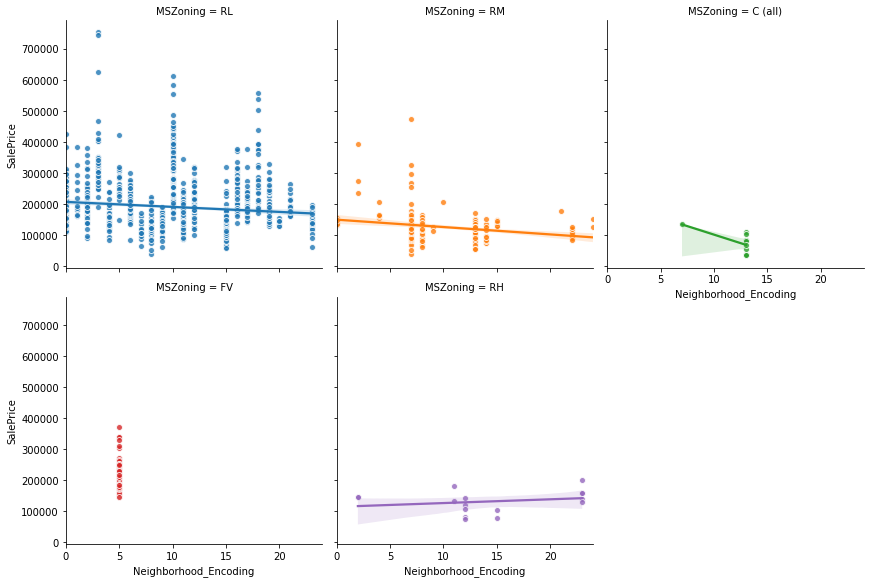

In [44]:
sns.lmplot(
    x="Neighborhood_Encoding", y="SalePrice", hue="MSZoning", col="MSZoning",
    data=f1_data, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

不同区域MSZoning影响地理位置neighborhood.

In [45]:
# PCA
from sklearn.decomposition import PCA

def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

In [46]:
# Check multicolinearity
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X, standardize=True):
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [47]:
calc_vif(f_data[continuous_features])

,variables,VIF
0,LotFrontage,1.388786
1,LotArea,1.242212
2,MasVnrArea,1.376748
3,BsmtFinSF1,inf
4,BsmtFinSF2,inf
5,BsmtUnfSF,inf
6,TotalBsmtSF,inf
7,1stFlrSF,inf
8,2ndFlrSF,inf
9,LowQualFinSF,inf


BsmtFinSF1,BsmtFinSF2,BsmtUnfSF加起来应等于TotalBsmtSF, 所以有infinite的VIF。同理，地上面积也是。

In [48]:
features = [x for x in continuous_features if x not in ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                                                       '1stFlrSF','2ndFlrSF','LowQualFinSF','GarageArea']]
print(features)

['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']


In [49]:
calc_vif(f_data[features])

,variables,VIF
0,LotFrontage,1.355985
1,LotArea,1.235620
2,MasVnrArea,1.343406
3,TotalBsmtSF,2.096106
4,GrLivArea,6.310454
5,BsmtFullBath,1.265234
6,BsmtHalfBath,1.056730
7,FullBath,2.727080
8,HalfBath,1.754888
9,TotRmsAbvGrd,3.468649


In [50]:
print("Correlation with SalePrice:\n")
print(f_data[features].corrwith(y))

Correlation with SalePrice:

LotFrontage      0.334901
LotArea          0.263843
MasVnrArea       0.475241
TotalBsmtSF      0.613581
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageCars       0.640409
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.470177
dtype: float64


In [51]:
low_corr_cols = f_data[features].corrwith(y)[abs(f_data[features].corrwith(y))<0.3].index.tolist()

In [52]:
features = [col for col in features if col not in low_corr_cols]

In [53]:
X0 = f_data.loc[:, features] # X0 are the features for PCA

# `apply_pca`, defined above, reproduces the code from the tutorial
pca, X_pca, loadings = apply_pca(X0)
print(loadings)

                   PC1       PC2       PC3       PC4       PC5       PC6  \
LotFrontage   0.185914  0.282191  0.259016  0.469103 -0.097846  0.613222   
MasVnrArea    0.241506  0.068000  0.324856  0.034944 -0.349675 -0.640514   
TotalBsmtSF   0.297174  0.069536  0.370741  0.273055  0.114475  0.014024   
GrLivArea     0.353598  0.360844 -0.205445 -0.136239 -0.056682 -0.003278   
FullBath      0.342267  0.003698 -0.373684 -0.173806 -0.173595  0.048550   
TotRmsAbvGrd  0.289748  0.389828 -0.342897 -0.197954 -0.176398  0.087156   
Fireplaces    0.215008  0.300278  0.281565 -0.084854  0.242379 -0.230271   
GarageCars    0.339461 -0.081035  0.108990  0.055727 -0.147053  0.009396   
WoodDeckSF    0.172483 -0.028969  0.373351 -0.659962  0.447610  0.228573   
OpenPorchSF   0.189374  0.052467 -0.348463  0.403750  0.707272 -0.274433   
YearBuilt     0.310117 -0.438207  0.099616  0.079740 -0.063216 -0.002309   
YearRemodAdd  0.284359 -0.355533 -0.156203 -0.022302  0.062546  0.142825   
GarageYrBlt 

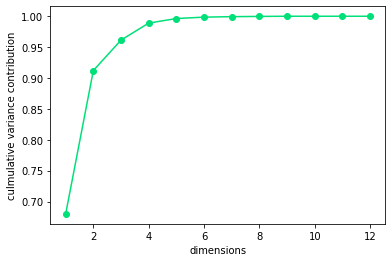

In [54]:
#绘制碎石图确定维度
from sklearn import decomposition
def nd_confirm(data,n):
    std = []
    for i in range(1,n):
        pca = decomposition.PCA(n_components=i)
        pca.fit(data)
        std.append(np.sum(pca.explained_variance_ratio_))
    # return std
    x = range(1,n)
    plt.plot(x,std,'-o',color='#00e079')
    plt.xlabel('dimensions')
    plt.ylabel('culmulative variance contribution')
    plt.show()
nd_confirm(X0,13)

In [55]:
# select first 3 dimensions (already cover 95%+)
for i in range(1,4):
    X0['PC'+str(i)]=0.0
    for j in range(0, len(loadings['PC1'])):
        if X0['PC'+str(i)].empty:
            X0['PC'+str(i)].append(loadings['PC'+str(i)][features[j]]*X0[features[j]])
        else:
            X0['PC'+str(i)]=X0['PC'+str(i)]+loadings['PC'+str(i)][features[j]]*X0[features[j]]
#             print(ld[features[j]]*X0[features[j]])

In [56]:
categorical_features = [col for col in mi_scores.head(20).index.tolist() 
                        if col not in continuous_features]
temp = [col for col in low_mi_features
                        if col not in continuous_features and col not in ['Functional', 'Utilities']]
categorical_features = categorical_features+temp
# print(categorical_features)

In [57]:
selected_features = categorical_features + ['PC1','PC2','PC3']
print(selected_features)

['OverallQual', 'Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'MSSubClass', 'GarageFinish', 'Foundation', 'BldgType', 'CentralAir', 'Electrical', 'HeatingQC', 'LotShape', 'MSZoning', 'Street', 'PC1', 'PC2', 'PC3']


In [58]:
X_final = pd.concat([f_data.loc[:,categorical_features], X0[['PC1','PC2','PC3']]], axis=1, ignore_index=False)

In [59]:
dummied_cat_cols = []
for col in categorical_features:
    if col in dummied_data.columns:
        dummied_cat_cols.append(col)
    else:
        for col2 in dummied_data:
            if col2.startswith(col):
                dummied_cat_cols.append(col2)

In [60]:
for col in dummied_data:
    if dummied_data[col].dtypes == 'object':
        print(col)
        dummied_data[col]=dummied_data[col].astype(float)

OverallQual
OverallCond


In [61]:
print(dummied_data['OverallQual'].dtypes)

float64


In [62]:
dummied_X_final = pd.concat([dummied_data.loc[:,dummied_cat_cols], X0[['PC1','PC2','PC3']]], axis=1, ignore_index=False)

In [63]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(model, dummied_X_final, y,
                              cv=10,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [19146.42311807 19878.35815068 20501.68236301 22646.42849315
 21205.75324201 16215.92260274 15455.5689726  17133.96679224
 21513.05474723 18140.76324201]


In [64]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
19183.79217237443


# Modeling

## Research on models

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

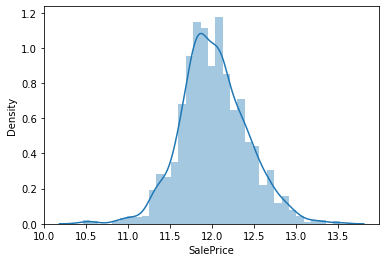

In [65]:
# log target to transform to normal distribution
y1 = np.log1p(y)
sns.distplot(y1)

### XGBoost

In [66]:
X_train0, X_valid0, y_train0, y_valid0 = train_test_split(dummied_X_final, y, train_size=0.8, test_size=0.2,
                                                      random_state=0, shuffle=False)

In [67]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train1 = sc_X.fit_transform(X_train0)
X_train1 = pd.DataFrame(X_train1, columns = X_train0.columns)
X_valid1 = sc_X.fit_transform(X_valid0)
X_valid1 = pd.DataFrame(X_valid1, columns = X_valid0.columns)
y_train1 = np.log1p(y_train0)
y_valid1 = np.log1p(y_valid0)
# print(y_train1)

In [68]:
# print(X_train1.columns)

In [69]:
from xgboost import XGBRegressor

xgb_naive = XGBRegressor()
xgb_naive.fit(X_train1, y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
print("Mean Absolute Error: " + str(get_mae(X_train1, X_valid1, y_train1, y_valid1,
                                        xgb_naive)))

Mean Absolute Error: 0.11127041929488145


In [71]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
def tuning(model, params):
    
    n_folds = 10
    skf = StratifiedKFold(n_splits=n_folds,random_state=0,shuffle=True)

    clf = GridSearchCV(estimator=model,param_grid=params,
                       cv=skf.split(X_train0, y_train0),
                        verbose=1, n_jobs=-1,
                        scoring='neg_mean_absolute_error')
    clf.fit(X_train0,y_train0)
    print(clf.best_score_)
    print(clf.best_params_)

In [72]:
# xgb = XGBRegressor(learning_rate=0.1, max_depth=2, n_estimators=800, early_stopping_rounds=30)

# params_grid = {'max_depth': [2,4,6,8],
#                     'n_estimators': [50,100,200,400,600,800,1000],
#                     'early_stopping_rounds':[30],
#                     'eval_set':[[(X_valid0, y_valid0)]],
#               'learning_rate':[0.1,0.05,0.01,0.001]}

# tuning(xgb, params_grid)

In [73]:
xgb = XGBRegressor(learning_rate=0.1, max_depth=2, n_estimators=800, early_stopping_rounds=30)

In [74]:
print("Mean Absolute Error: " + str(get_mae(X_train1, X_valid1, y_train1, y_valid1,
                                        xgb)))

[22:17:39] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Mean Absolute Error: 0.10409697501384645


### Random Forest Tree

In [75]:
model = RandomForestRegressor(random_state=0)

params_grid = {'max_features': ['sqrt', 'auto'],
                    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
                    'min_samples_leaf':[1,2,4],
                    'max_depth':[0, 20, 40, 60, 80, 100, 150, 200, None],
              'bootstrap':[True, False]}
# tuning(model, params_grid)

### Linear Regression

## Predict trainset and submit

### Preprocess test data

In [76]:
# select features
test_data = test_data.loc[:, categorical_features+continuous_features+['Id']]

In [77]:
# print(test_data.head())

In [78]:
imputed_X_test = impute_missing(test_data,'mean')

In [79]:
labeled_test_data = imputed_X_test.copy()
labeled_test_data_1 = imputed_X_test.copy()
manual_encoding_ordinal(labeled_test_data, labeled_test_data_1)

In [80]:
# dummy encoding nominal data
nominal_features = [col for col in categorical_features if col not in ordinal_features]
dummied_data = pd.get_dummies(labeled_test_data, columns=nominal_features)

In [81]:
X1 = dummied_data.loc[:, features]
pca, X_pca, loadings = apply_pca(X1)
# print(loadings)

# select first 3 dimensions (already cover 95%+)
for i in range(1,4):
    X1['PC'+str(i)]=0.0
    for j in range(0, len(loadings['PC1'])):
        if X1['PC'+str(i)].empty:
            X1['PC'+str(i)].append(loadings['PC'+str(i)][features[j]]*X1[features[j]])
        else:
            X1['PC'+str(i)]=X1['PC'+str(i)]+loadings['PC'+str(i)][features[j]]*X1[features[j]]
#             print(ld[features[j]]*X0[features[j]])

In [82]:
dummied_cat_cols = []
for col in categorical_features:
    if col in dummied_data.columns:
        dummied_cat_cols.append(col)
    else:
        for col2 in dummied_data:
            if col2.startswith(col):
                dummied_cat_cols.append(col2)

In [83]:
for col in dummied_data:
    if dummied_data[col].dtypes == 'object':
        print(col)
        dummied_data[col]=dummied_data[col].astype(float)

OverallQual


In [84]:
X_test_final = pd.concat([dummied_data.loc[:,dummied_cat_cols], X1[['PC1','PC2','PC3']]], axis=1, ignore_index=False)

In [85]:
print(X_train0.shape)
print(X_test_final.shape)

(1168, 70)
(1459, 71)


In [86]:
print([col for col in X_test_final if col not in X_train0])

['MSSubClass_150']


In [87]:
X_test_final = X_test_final.loc[:, X_test_final.columns != 'MSSubClass_150']

In [88]:
rft = RandomForestRegressor(random_state=0, bootstrap=True, max_depth=20, max_features='sqrt', min_samples_leaf=1, 
                            n_estimators=1000)
# {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 1000}

In [89]:
# log transform
X_test_final_1 = sc_X.fit_transform(X_test_final)
X_test_final_1 = pd.DataFrame(X_test_final_1, columns = X_test_final.columns)

In [90]:
# Use the model to make predictions
# rft.fit(X_train1, y_train1)
# preds1 = rft.predict(X_test_final_1)
# or use xgb
xgb.fit(X_train1, y_train1)
preds1 = xgb.predict(X_test_final_1)

[22:17:40] WARNING: ../src/learner.cc:541: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [91]:
preds1 = np.expm1(preds1)

In [92]:
my_submission = pd.DataFrame({'Id': test_data.Id, 'SalePrice': preds1})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

## Test and evaluate models

### Data leakage